# Bike Sharing - Linear Regression

## Problem Statement
   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


   In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


   They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   - Which variables are significant in predicting the demand for shared bikes.
   - How well those variables describe the bike demands
   
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily  bike demands across the American market based on some factors. 


## Business Goal:
   You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

## Reading and Understanding the Data

In [2]:
inp0 = pd.read_csv('day.csv')

In [3]:
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking shape of the dataframe i.e rows, columns
inp0.shape

(730, 16)

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
inp0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Renaming some of the columns to improve data readability and understanding

In [7]:
inp0.rename(columns = {'yr':'year', 'mnth': 'month', 'hum':'humidity', 'cnt':
                    'demand'}, inplace = True)

Checking for missing data in each column:

In [8]:
inp0.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [9]:
inp0.duplicated().sum()             #Inspecting duplicated rows

0

Dropping redundant variables which I suppose are not needed for analysis & model building i.e. instant and dteday

In [10]:
inp0 = inp0.drop(['instant', 'dteday'], axis=1)

In [11]:
inp0.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Mapping the categorical variables back to their original labels as per the data dictionary provided**:

- season: ( 1: spring, 2: summer, 3: fall, 4: winter )
- month: ( 1: Jan , 2: Feb, 3: Mar, 4: Apr, 5: May, 6: Jun, 7: Jul, 8: Aug, 9: Sep, 10: Oct, 11: Nov, 12: Dec )
- weekday: ( 0: Sun, 1: Mon, 2: Tues, 3: Wed, 4: Thurs, 5: Fri, 6: Sat )
- weathersit:

    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [12]:
inp0.season = inp0.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
inp0.month = inp0.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})
inp0.weekday = inp0.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tues', 3: 'Wed', 4:'Thurs', 5: 'Fri', 6:'Sat'})
inp0.weathersit = inp0.weathersit.map({1: 'Clear or Partly Cloudy', 2: 'Misty & Cloudy',3: 'Light Rain & Snow',4: 'Heavy Rain & Snow'})

In [13]:
inp0.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,demand
0,Spring,0,Jan,0,Mon,1,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tues,1,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thurs,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# creating lists for categorical and numerical variables respectively
cat_cols = ['season','year','month','holiday','weekday','workingday','weathersit']
num_cols = ['temp','atemp','humidity','windspeed','casual','registered']

## Univariate Analysis - Categorical Features

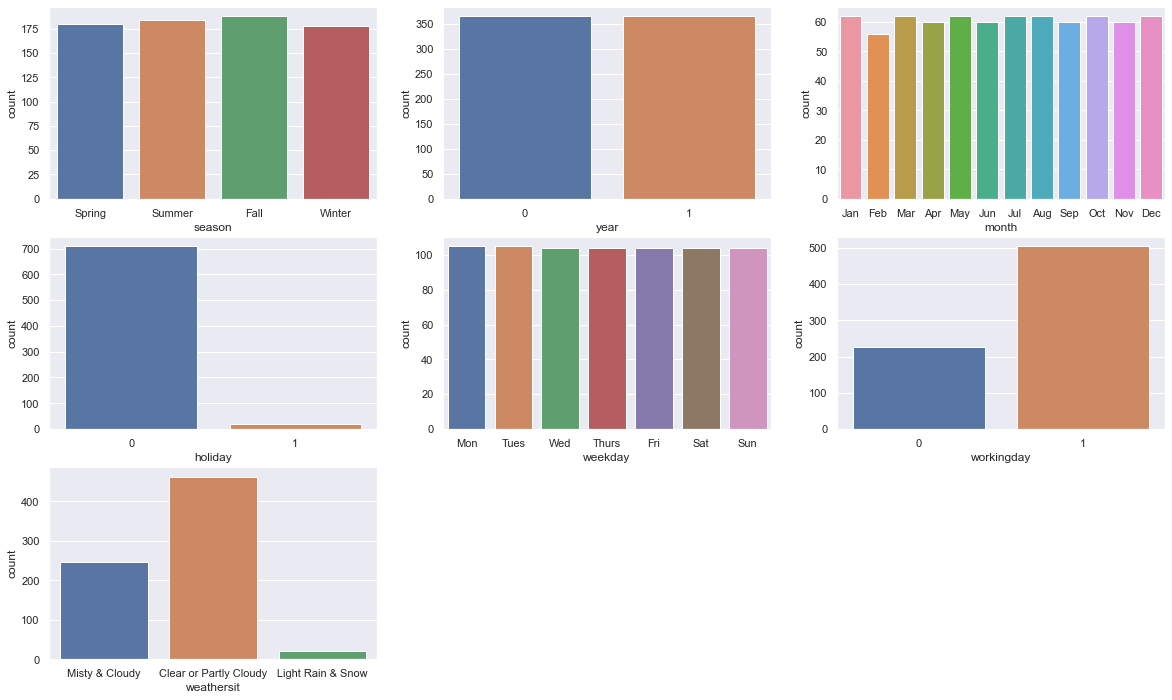

In [15]:
# Analysing/visualizing the categorical columns using countplots

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'season', data = inp0)
plt.subplot(3,3,2)
sns.countplot(x = 'year', data = inp0)
plt.subplot(3,3,3)
sns.countplot(x = 'month', data = inp0)
plt.subplot(3,3,4)
sns.countplot(x = 'holiday', data = inp0)
plt.subplot(3,3,5)
sns.countplot(x = 'weekday', data = inp0)
plt.subplot(3,3,6)
sns.countplot(x = 'workingday', data = inp0)
plt.subplot(3,3,7)
sns.countplot(x = 'weathersit', data = inp0)
plt.show()

## Univariate Analysis - Numerical Features

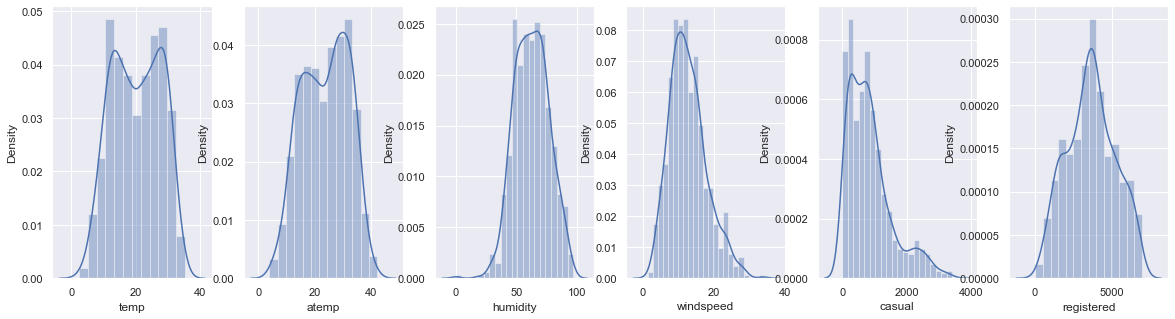

In [16]:
# Analysing/visualizing the numerical columns using distribution plots

plt.figure(figsize=(20, 5))
plt.subplot(1,6,1)
sns.distplot(inp0.temp)
plt.subplot(1,6,2)
sns.distplot(inp0.atemp)
plt.subplot(1,6,3)
sns.distplot(inp0.humidity)
plt.subplot(1,6,4)
sns.distplot(inp0.windspeed)
plt.subplot(1,6,5)
sns.distplot(inp0.casual)
plt.subplot(1,6,6)
sns.distplot(inp0.registered)
plt.show()

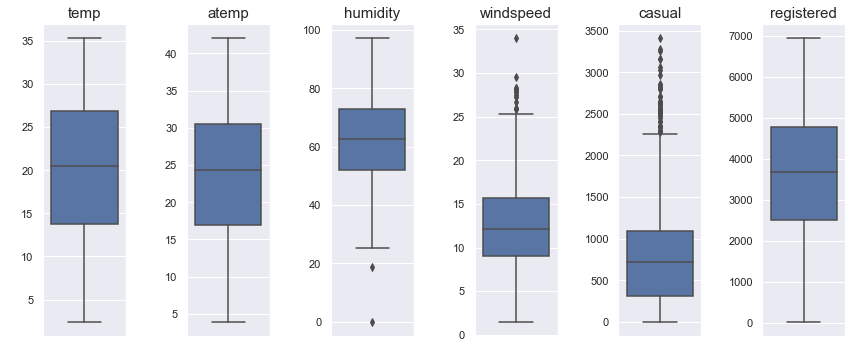

In [17]:
# Analysing/visualizing the numerical columns using box plots

fig, ax =plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12,5))

for i in range(len(num_cols)):
    sns.boxplot(y=inp0[num_cols[i]], ax=ax[i])
    
    ax[i].set_title(f'{num_cols[i]}', fontsize=15)
    ax[i].set_ylabel(' ')
    
plt.tight_layout()
plt.show()

- I don't see any abnormality in the numerical variables except for some oultiers which is not an issue. 

## Target Variable

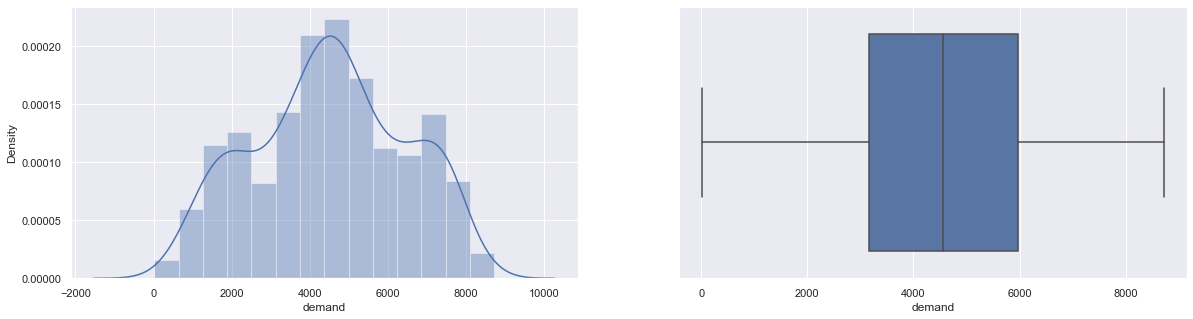

In [18]:
# Analysing/visualizing the target column using distribution and box plot

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.distplot(inp0.demand)
plt.subplot(1,2,2)
sns.boxplot(inp0.demand)
plt.show()

- Registered variable seems to be normally distributed and has similar pattern like target variable Demand.

## Bivariate Analysis

### Categorical Features Vs Target

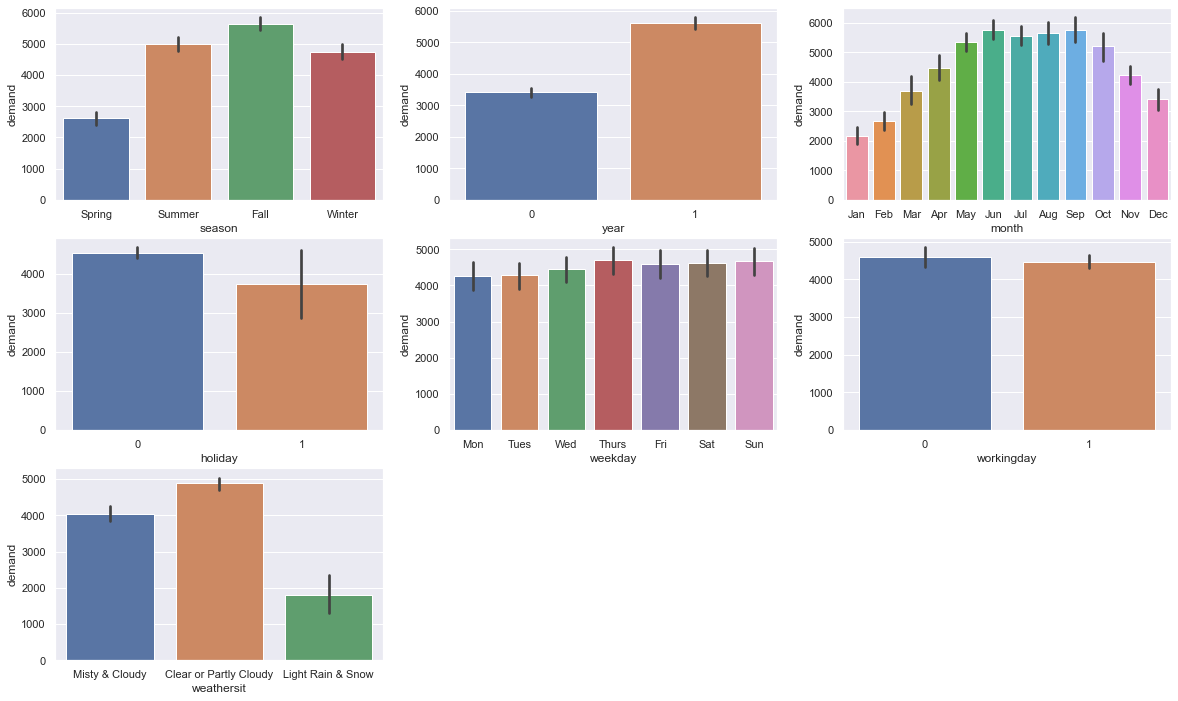

In [19]:
# Analysing/visualizing the categorical columns
# to see how independant variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'demand', data = inp0)
plt.subplot(3,3,2)
sns.barplot(x = 'year', y = 'demand', data = inp0)
plt.subplot(3,3,3)
sns.barplot(x = 'month', y = 'demand', data = inp0)
plt.subplot(3,3,4)
sns.barplot(x = 'holiday', y = 'demand', data = inp0)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday', y = 'demand', data = inp0)
plt.subplot(3,3,6)
sns.barplot(x = 'workingday', y = 'demand', data = inp0)
plt.subplot(3,3,7)
sns.barplot(x = 'weathersit', y = 'demand', data = inp0)
plt.show()

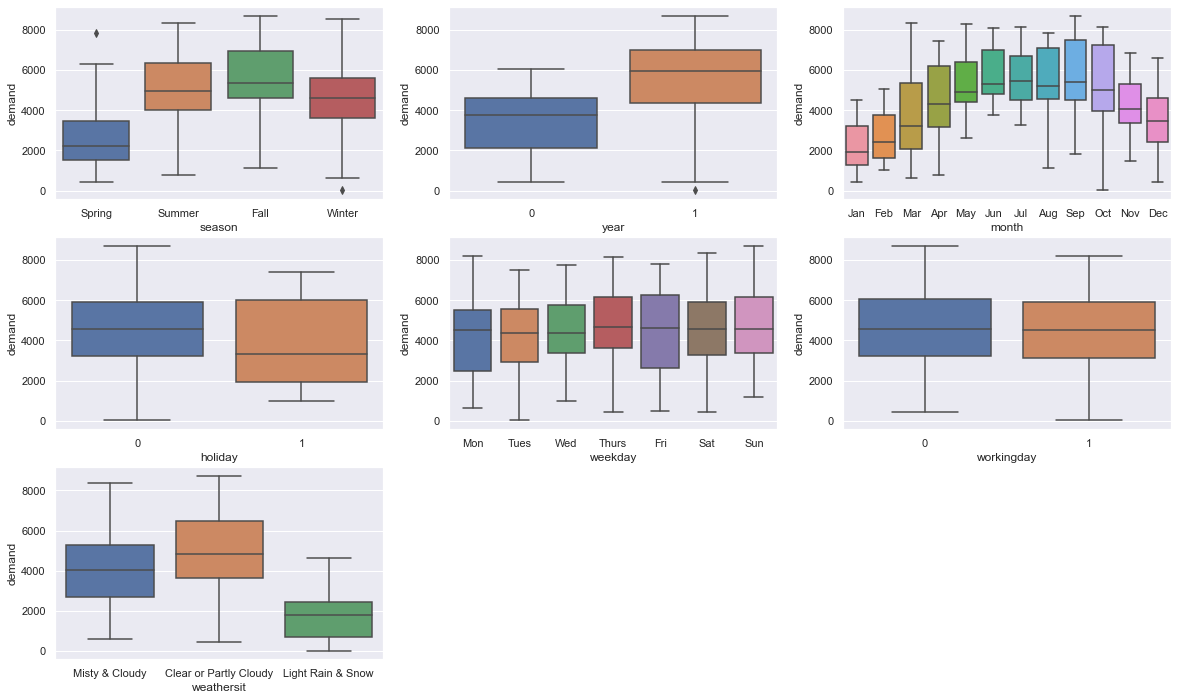

In [20]:
# Analysing/visualizing the categorical columns
# to see how independant variable stands against the target variable
# using box plots

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'demand', data = inp0)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'demand', data = inp0)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'demand', data = inp0)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'demand', data = inp0)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'demand', data = inp0)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'demand', data = inp0)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'demand', data = inp0)
plt.show()

**Insights:**
- Fall season seems to have the maximum demand of the shared bikes followed by winter & summer.
- Jun, Jul & Sep months having the highest average demand or bookings.
- The demand of shared bikes has increased excessively from 2018 to 2019 which implies good growth in business.
- Demand seems to be slightly less when it’s holiday and it seems reasonable because people may want to spend time with their family.
- No visible trend or any solid pattern in weekday variable.
- Demand seemed approximately equal for both working day and non-working day.
- Demand is exceptionally high on clear or partly cloudy days.



### Numerical Features Vs Target

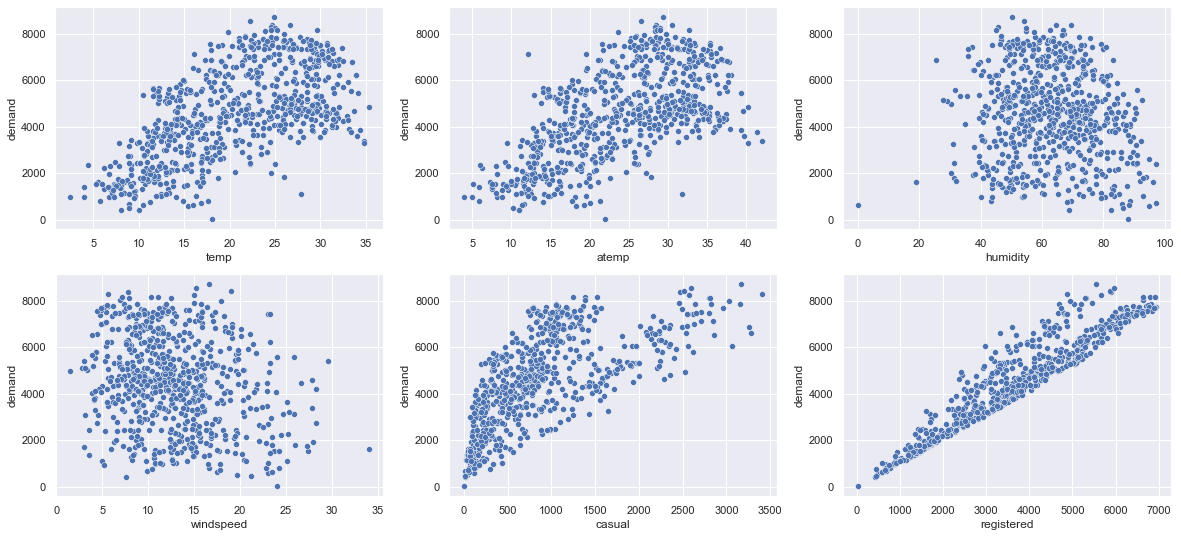

In [21]:
# Analysing/visualizing the numerical columns
# to see how independant variable stands against the target variable
# using scatter plots

plt.figure(figsize=(20, 9))
plt.subplot(2,3,1)
sns.scatterplot(x = 'temp', y = 'demand', data = inp0)
plt.subplot(2,3,2)
sns.scatterplot(x = 'atemp', y = 'demand', data = inp0)
plt.subplot(2,3,3)
sns.scatterplot(x = 'humidity', y = 'demand', data = inp0)
plt.subplot(2,3,4)
sns.scatterplot(x = 'windspeed', y = 'demand', data = inp0)
plt.subplot(2,3,5)
sns.scatterplot(x = 'casual', y = 'demand', data = inp0)
plt.subplot(2,3,6)
sns.scatterplot(x = 'registered', y = 'demand', data = inp0)
plt.show()

- As clearly seen above, temp & atemp having linear relationship with the demand.

### Numerical Features Vs Season

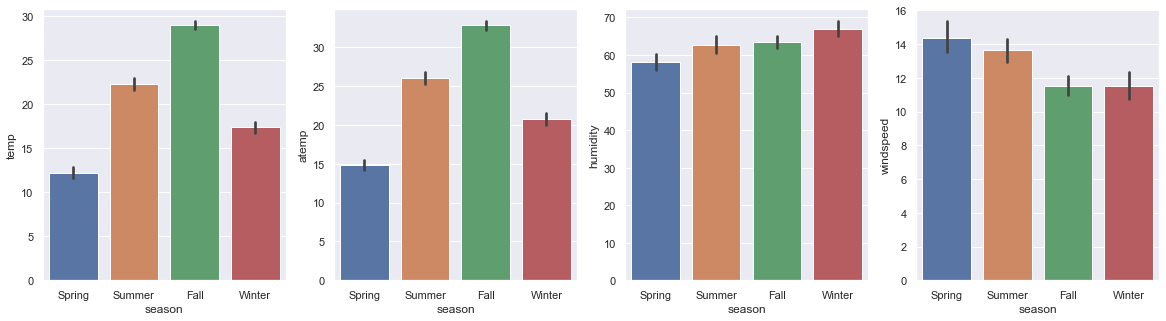

In [22]:
# Analysing/visualizing the numerical columns
# to see how independant variable stands against the Season variable

plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
sns.barplot(y = 'temp', x = 'season', data = inp0)
plt.subplot(1,4,2)
sns.barplot(y = 'atemp', x = 'season', data = inp0)
plt.subplot(1,4,3)
sns.barplot(y = 'humidity', x = 'season', data = inp0)
plt.subplot(1,4,4)
sns.barplot(y = 'windspeed', x = 'season', data = inp0)
plt.show()

**Insights:**

- Temperature seems to be highest in Fall season, not in summer season surprisingly and lowest in spring season.
- Temp & atemp variable shows a very similar season wise pattern.
- Humidity is highest in the winter followed by fall & summer.
- Windspeed is found to be highest in the spring season followed by Winter.

### Numerical Features Vs Weather

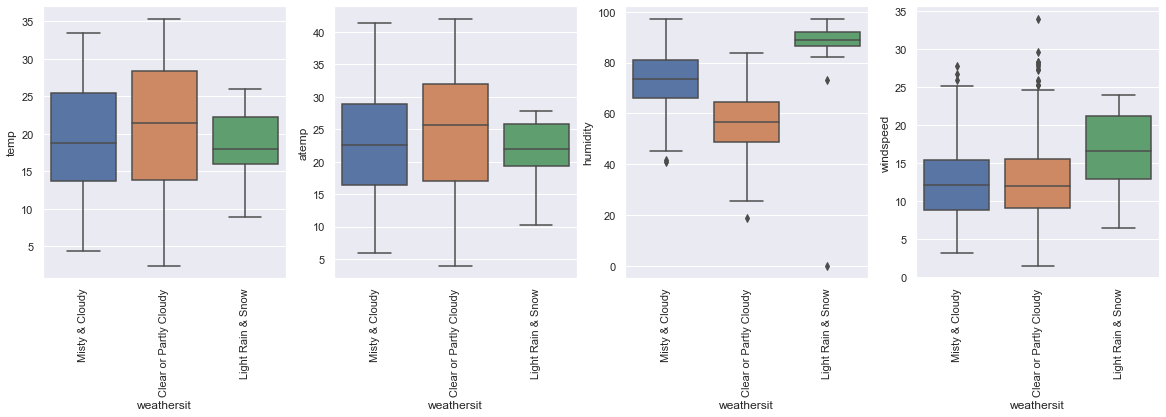

In [23]:
# Analysing/visualizing the numerical columns
# to see how independant variable stands against the Weather variable

plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
sns.boxplot(y = 'temp', x = 'weathersit', data = inp0)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.boxplot(y = 'atemp', x = 'weathersit', data = inp0)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.boxplot(y = 'humidity', x = 'weathersit', data = inp0)
plt.xticks(rotation=90)
plt.subplot(1,4,4)
sns.boxplot(y = 'windspeed', x = 'weathersit', data = inp0)
plt.xticks(rotation=90)

plt.show()

**Insights:**

- temp & atemp is highest when the skies are clear or partly cloudy.
- humidity median values are highest when the skies are Misty & Cloudy.
- windspeed seems to be highest during light rain & light snow.

## Multi-Variate Analysis

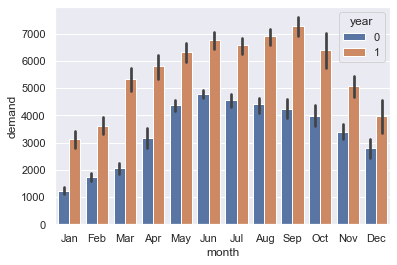

In [24]:
# Analysing/visualizing year column in each month versus the target

sns.barplot(data=inp0, x='month', y='demand', hue='year')
plt.show()

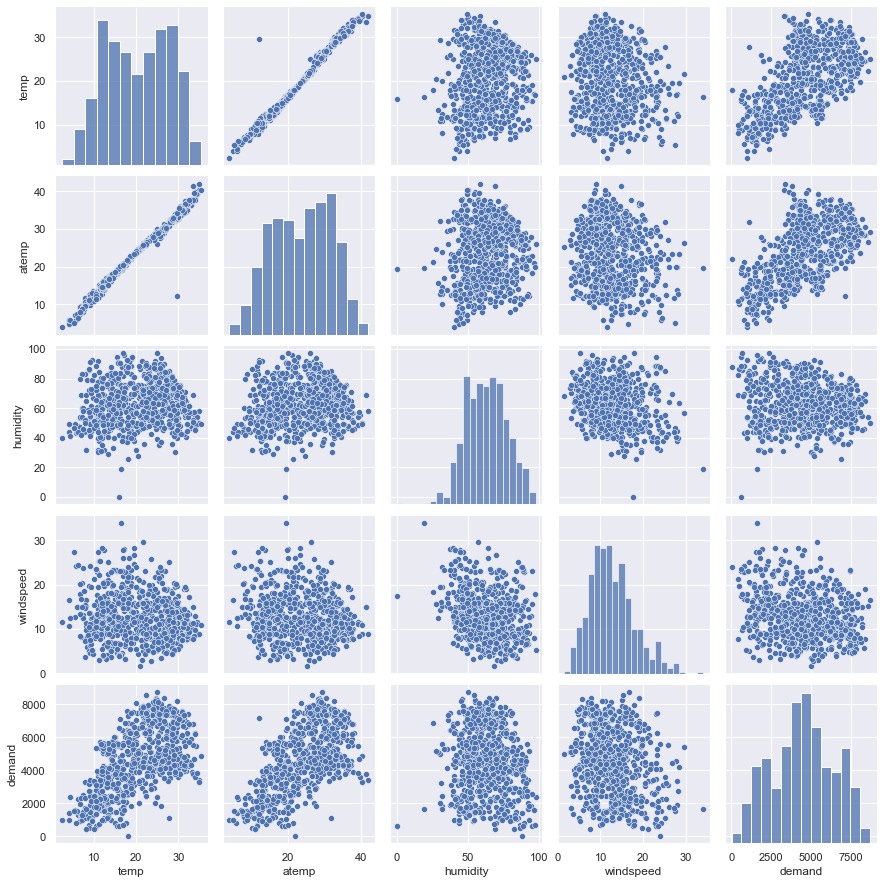

In [25]:
# plotting pairplot to check relationships between numerical variables

sns.pairplot(data=inp0,vars= ['temp','atemp','humidity','windspeed','demand'])
plt.show()

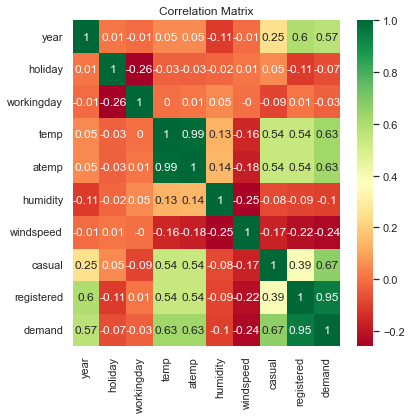

In [26]:
#plotting heatmap to check correlation

plt.figure(figsize = (6,6))
sns.heatmap(round(inp0.corr(),2), annot = True, cmap="RdYlGn")
plt.title("Correlation Matrix")
plt.show()

- Dropping Casual and Registered as they are not needed for model building because we have already a target variable "Demand" which is sum of these variables and considering Casual & Registered may cause multicollinearity.

- And I am also dropping Weekday column, I suppose it does not give any insight about the target and is reduntant. So I will not consider it for model building.

In [27]:
inp0.drop(['casual','registered','weekday'], axis=1, inplace=True)

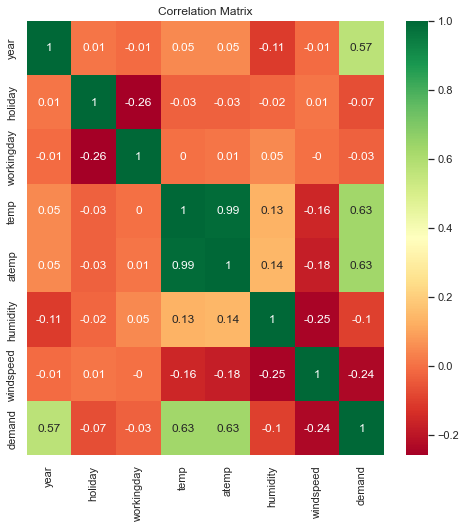

In [28]:
plt.figure(figsize = (8,8))
sns.heatmap(round(inp0.corr(),2), annot = True, cmap="RdYlGn")
plt.title("Correlation Matrix")
plt.show()

- Temp & atemp variables are having the highest correlation with target "demand"
- However It seems like these are correlated to each other, It may lead to multicollinearity.

In [29]:
inp0.head()

,season,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,demand
0,Spring,0,Jan,0,1,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,1,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation

- In order to fit a regression line, Modifying the categorical variables into numerical using dummy variables technique.

In [30]:
# creating dummy variables for season, month and weathersit columns

season = pd.get_dummies(inp0['season'], drop_first = True)
month = pd.get_dummies(inp0['month'], drop_first = True)
weather = pd.get_dummies(inp0['weathersit'], drop_first = True)

In [31]:
# concatinating the dataframe, with the dummy variables. 

inp0 = pd.concat([inp0, season, month, weather], axis = 1)

In [32]:
# dropping original columns as we have already created dummy variables.

inp0.drop(['season','month', 'weathersit'], axis = 1, inplace = True)

In [33]:
inp0.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,demand,Spring,Summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Rain & Snow,Misty & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(inp0, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
# checking shape of train & test data

train.shape, test.shape

((510, 24), (219, 24))

## Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler() 

In [39]:
train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,demand,Spring,Summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Rain & Snow,Misty & Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
num_cols = ['temp','atemp', 'humidity', 'windspeed','demand']

train[num_cols] = scaler.fit_transform(train[num_cols]) #applying scaler to numerical columns only

In [41]:
train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,demand,Spring,Summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Rain & Snow,Misty & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Let's check the correlation coefficients to see which variables are highly correlated**


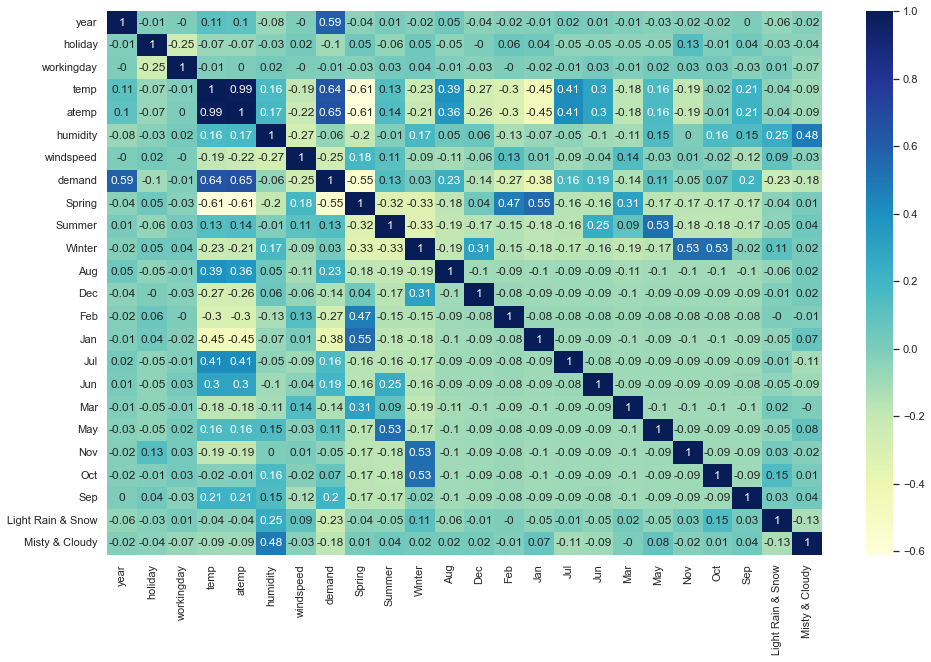

In [42]:
plt.figure(figsize = (16, 10))
sns.heatmap(round(train.corr(),2), annot = True, cmap="YlGnBu")
plt.show()

**Correlation can be seen between:** 
- temp - demand
- atemp - demand
- year - demand
- Misty & Cloudy - humidity
- Summer - May
-  Spring - Jan

## Dividing into X and Y sets for the model building

In [43]:
y_train = train.pop('demand')
X_train = train

## Feature Selection using RFE

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running Recursive feature elimination 
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 8),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Light Rain & Snow', True, 1),
 ('Misty & Cloudy', True, 1)]

In [47]:
# creating a list of columns returned by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Rain & Snow',
       'Misty & Cloudy'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'], dtype='object')

### Building Linear Model using statsmodel

In [49]:
import statsmodels.api as sm

In [50]:
X_train_rfe = X_train[cols]

In [51]:
X_train_lm = sm.add_constant(X_train_rfe)   #Adding a constant

In [52]:
lr_1 = sm.OLS(y_train,X_train_lm).fit()     #running Linear Model
print(lr_1.summary())                       #printing summary of Linear Model

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        01:47:11   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.03

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# creating helper function to calculate Variance inflation factor (VIF)

def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [55]:
check_vif(X_train_rfe)

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Misty & Cloudy,2.32
0,year,2.09
11,Nov,1.83
9,Jan,1.75


Dec variable is having high p-value therefore dropping the Dec variable and will create the linear model again without considering it.

In [56]:
X = X_train_rfe.drop(["Dec"], axis = 1)

In [57]:
#Let's see the summary of our linear model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.25e-189
Time:                        01:47:12   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3030      0.03

In [58]:
check_vif(X)

,Features,VIF
3,humidity,29.12
2,temp,16.80
4,windspeed,4.71
5,Spring,4.37
7,Winter,3.78
6,Summer,2.79
13,Misty & Cloudy,2.29
0,year,2.09
8,Jan,1.67
9,Jul,1.59


Nov seems to be having very high p-value now. Hence dropping the nov variable.

In [59]:
X = X.drop(['Nov'], axis=1)

In [60]:
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train,X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.45e-190
Time:                        01:47:13   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2957      0.03

In [61]:
check_vif(X)

,Features,VIF
3,humidity,29.05
2,temp,16.70
4,windspeed,4.66
5,Spring,4.34
7,Winter,3.38
6,Summer,2.78
12,Misty & Cloudy,2.28
0,year,2.09
8,Jan,1.67
9,Jul,1.59


p-value for jan variable is high which makes it insignificant for the model and will have to drop it

In [62]:
X = X.drop(['Jan'], axis=1)

In [63]:
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train,X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.69e-190
Time:                        01:47:14   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2841      0.03

Now, all p-values seems in range however we have to check VIF values too

In [64]:
check_vif(X)

,Features,VIF
3,humidity,28.06
2,temp,16.02
4,windspeed,4.65
5,Spring,4.01
7,Winter,3.35
6,Summer,2.78
11,Misty & Cloudy,2.28
0,year,2.08
8,Jul,1.58
9,Sep,1.38


VIF value for humidity variable seems to be very high, so dropping the humidity variable.

In [65]:
X = X.drop(['humidity'], axis=1)

In [66]:
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train,X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.40e-187
Time:                        01:47:15   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1996      0.03

In [67]:
check_vif(X)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
0,year,2.07
6,Winter,1.79
7,Jul,1.58
10,Misty & Cloudy,1.55
8,Sep,1.34
9,Light Rain & Snow,1.08


Again, VIF value of temp is still greater than 5 which is not a good sign. Therefore to make the model better, dropping the Jul variable as it has the highest p-value, Temp variable cannot be dropped because it is having correlation with the target as we have analyzed already. 

In [68]:
X = X.drop(['Jul'], axis=1)

In [69]:
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train,X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.36e-187
Time:                        01:47:15   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1910      0.03

In [70]:
check_vif(X)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,year,2.07
4,Spring,1.99
5,Summer,1.89
6,Winter,1.63
9,Misty & Cloudy,1.54
7,Sep,1.23
8,Light Rain & Snow,1.08
1,holiday,1.04


All VIFs seems to be in range and are less than 5 now. Therefore there is no multicollinearity between the independant variables. Therefore Considering it for final evaluation and predictions.

## Assumptions of Linear Regression

#### Linearity

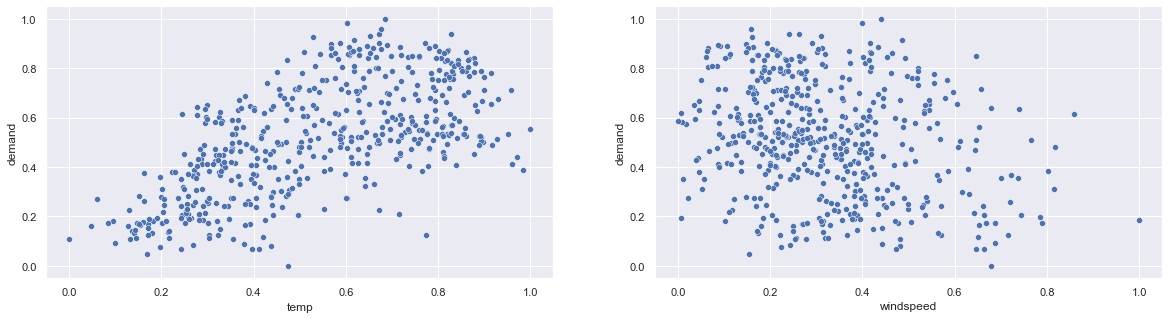

In [71]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.scatterplot(X.temp, y_train)

plt.subplot(1,2,2)
sns.scatterplot(X.windspeed, y_train)

plt.show()

Clearly there is a linear relationship in both the plots. Therefore this assumption is validated!

#### Normal Distribution of Residuals

In [72]:
y_train_pred = lr_6.predict(X_train_lm)

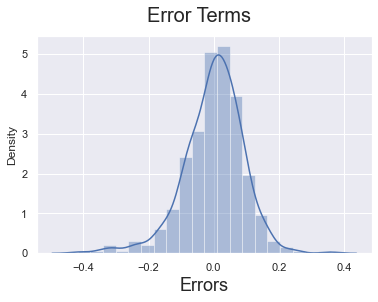

In [73]:
# Plotting  the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

From the above plot, It is evident that Error Terms Distribution is Normallly Distributed across 0.

#### Multicollinearity

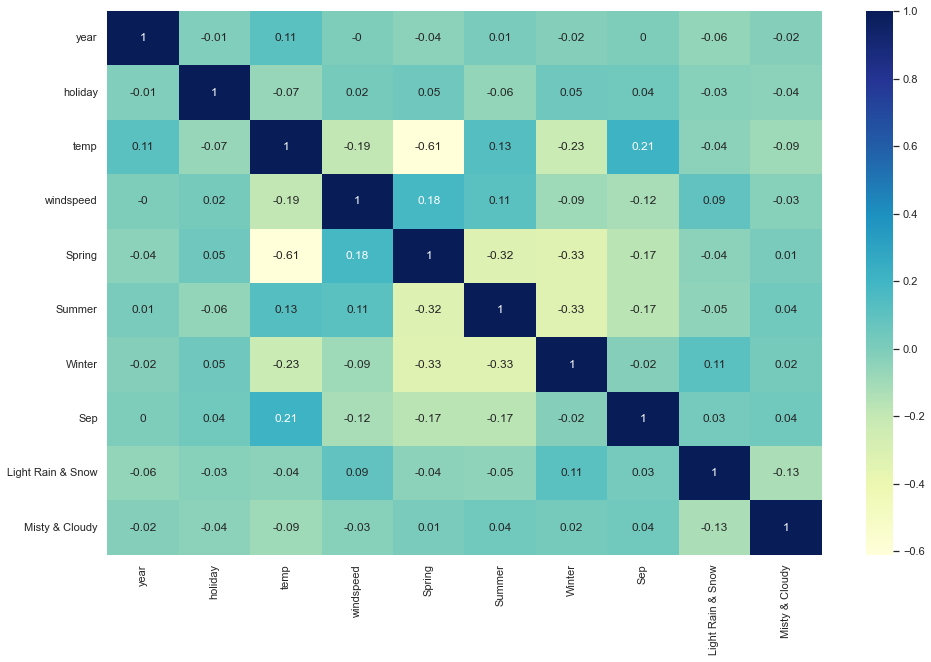

In [74]:
plt.figure(figsize = (16, 10))
sns.heatmap(round(X.corr(),2), annot = True, cmap="YlGnBu")
plt.show()

It can be seen that there is no multicollinearity between the variables from the above heatmap.

#### Homoscedasticity

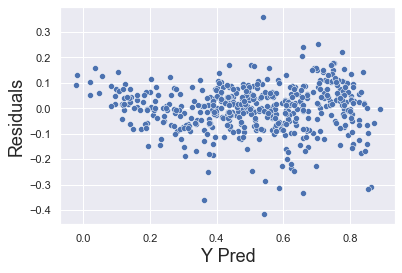

In [75]:
fig = plt.figure()
residual = y_train - y_train_pred
sns.scatterplot(y_train_pred,residual)
plt.xlabel('Y Pred', fontsize = 18)
plt.ylabel('Residuals', fontsize = 18)
plt.show()

Homoscedasticity means a constant error and In this current case, the points clearly look like a constant variance around the zero-line.

#### Independence of residuals (absence of auto-correlation)

To validate this assumption, I have used Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables (0 - 2: positive auto-correlation, 2 - 4: negative auto-correlation) 

In [76]:
from statsmodels.stats.stattools import durbin_watson

In [77]:
r = np.array(residual)

In [78]:
dw_test = durbin_watson(r)
dw_test

2.0757097645413056

Durbin-Watson value is 2.076 i.e close to 2, Therefore there is no autocorrelation.

## Making Predictions Using the Final Model

Now that I have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying feature scaling on the test sets

In [79]:
num_cols = ['temp','atemp', 'humidity', 'windspeed','demand']

test[num_cols] = scaler.transform(test[num_cols])

In [80]:
test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,demand,Spring,Summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Rain & Snow,Misty & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting Test Set into X_test and y_test

In [81]:
y_test = test.pop('demand')
X_test = test

In [82]:
X_test_new = X_test[X.columns]

In [83]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test_new)

In [84]:
# Making predictions using the sixth model

y_pred_lm6 = lr_6.predict(X_test_lm6)

## Model Evaluation

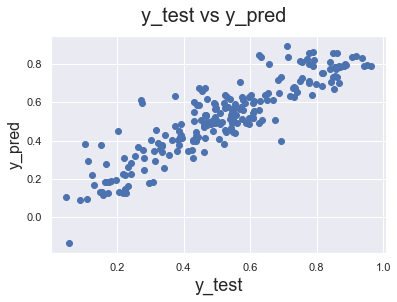

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [86]:
from sklearn.metrics import r2_score

#### R2 Score:

In [87]:
R2 = r2_score(y_test, y_pred_lm6)         #calculating r_squared value for test set
print(round(R2,3))

0.804


#### Adjusted R2 Score:

In [88]:
N = X_test_new.shape[0]           #rows in test dataframe
p = X_test_new.shape[1]           #columns in test dataframe    

In [89]:
adjusted_r2 = round(1-(1-R2)*(N-1)/(N-p-1),3)        #calculating adjusted_r2 value for test set
adjusted_r2

0.794

In [90]:
lr_6.params

const                0.190994
year                 0.234060
holiday             -0.096865
temp                 0.478177
windspeed           -0.148155
Spring              -0.055092
Summer               0.060987
Winter               0.095929
Sep                  0.090932
Light Rain & Snow   -0.286002
Misty & Cloudy      -0.080124
dtype: float64

### Train Model Vs Test Model:

**R-squared:**
 - Train - 0.833
 - Test - 0.804
 
**Adj. R-squared:**
  - Train - 0.830
  - Test - 0.794

**From above comparison, I can conclude that the model is able to explain more than 80% of the variance of demand of shared bikes.**

**Hence, The equation of best fitted line is:**

$ Demand = 0.234060  \times  year - 0.096865  \times  holiday + 0.478177 \times temp - 0.148155 \times windspeed - 0.055092 \times spring + 0.060987 \times summer + 0.095929 \times winter + 0.090932 \times sep - 0.286002 \times lightrainsnow - 0.080124 \times mistycloudy + 0.190994 $

**Top three variables can be as follows on the basis of final equation coefficients:**

- Temp
- Year
- Light Rain & Snow